Usando um dataset de exemplo, utilizamos dois algoritmos de exemplo ao que será usado na aplicação, kmeans para separar os clientes e keras para prever a classsificação

In [7]:
# Importando os bibliotecas:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [8]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [9]:
df['Profession'] = LabelEncoder().fit_transform(df['Profession'])

In [11]:
df['Profession'].value_counts()

Profession
0    612
5    339
3    234
2    179
1    161
4    153
7    142
8     85
6     60
9     35
Name: count, dtype: int64

In [6]:
# prompt: drop column CustomerID

df = df.drop('CustomerID', axis=1)


In [12]:
df.describe()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.407000,48.960000,110731.821500,50.962500,2.938500,4.102500,3.768500
std,0.491398,28.429747,45739.536688,27.934661,2.649194,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,25.000000,74572.000000,28.000000,0.000000,1.000000,2.000000
50%,0.000000,48.000000,110045.000000,50.000000,3.000000,3.000000,4.000000
75%,1.000000,73.000000,149092.750000,75.000000,5.000000,7.000000,5.000000
max,1.000000,99.000000,189974.000000,100.000000,9.000000,17.000000,9.000000


In [13]:
df.isnull().sum()


Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [14]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)
    distorcoes.append(modelo01.inertia_)

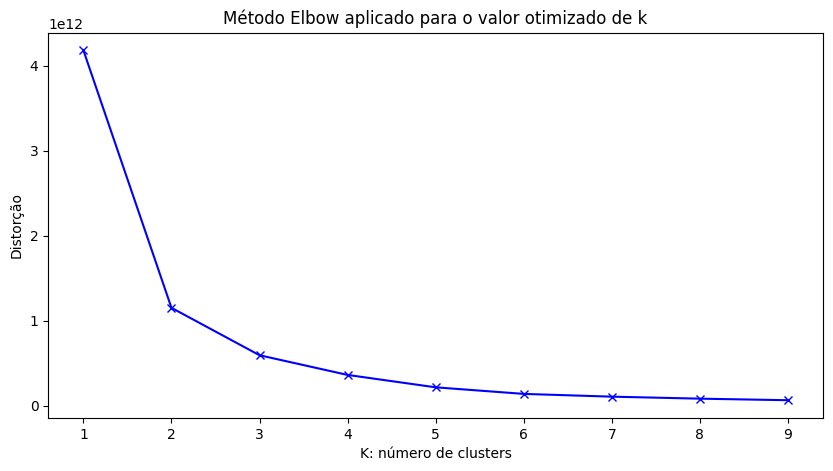

In [15]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [23]:
modelo_KMeans = KMeans(n_clusters=4)
modelo_KMeans.fit(df)

KMeans(n_clusters=4)

In [24]:
df['clusters'] = modelo_KMeans.predict(df)

In [25]:
silhouette = silhouette_score(df, df['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.5324


In [26]:
df.rename(columns={'clusters': 'Classificação_cliente'}, inplace=True)


In [27]:
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Classificação_cliente
0,1,19,15000,39,5,1,4,3
1,1,21,35000,81,2,3,3,3
2,0,20,86000,6,2,1,1,1
3,0,23,59000,77,7,0,2,3
4,0,31,38000,40,3,2,6,3
...,...,...,...,...,...,...,...,...
1995,0,71,184387,40,0,8,7,0
1996,0,91,73158,32,1,7,7,1
1997,1,87,90961,14,5,9,2,1
1998,1,77,182109,4,4,7,2,0


In [28]:
df.corr().round(4)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Classificação_cliente
Gender,1.0000,0.0058,0.0047,-0.0005,0.0089,0.0207,0.0002,-0.0334
Age,0.0058,1.0000,0.0214,-0.0418,-0.0228,-0.0143,0.0383,-0.0324
Annual Income ($),0.0047,0.0214,1.0000,0.0233,0.0204,0.0891,0.0930,-0.6934
Spending Score (1-100),-0.0005,-0.0418,0.0233,1.0000,-0.0534,-0.0289,0.0022,0.0118
Profession,0.0089,-0.0228,0.0204,-0.0534,1.0000,-0.0024,0.0461,0.0066
Work Experience,0.0207,-0.0143,0.0891,-0.0289,-0.0024,1.0000,0.0119,-0.0695
Family Size,0.0002,0.0383,0.0930,0.0022,0.0461,0.0119,1.0000,-0.0236
Classificação_cliente,-0.0334,-0.0324,-0.6934,0.0118,0.0066,-0.0695,-0.0236,1.0000


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Classificação_cliente', ylabel='Cliente'>

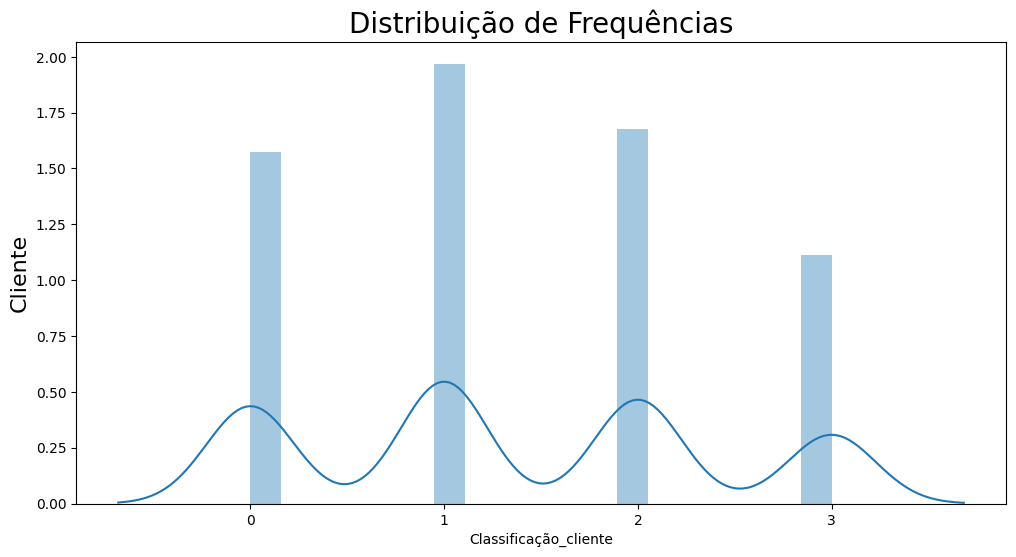

In [29]:
ax = sns.distplot(df['Classificação_cliente'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Cliente', fontsize=16)

ax

In [30]:
X = df.iloc[:, 0:-1]
X

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...
1995,0,71,184387,40,0,8,7
1996,0,91,73158,32,1,7,7
1997,1,87,90961,14,5,9,2
1998,1,77,182109,4,4,7,2


In [31]:
y = df['Classificação_cliente']
y

0       3
1       3
2       1
3       3
4       3
       ..
1995    0
1996    1
1997    1
1998    0
1999    2
Name: Classificação_cliente, Length: 2000, dtype: int32

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [33]:
y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

In [34]:
encoder = OneHotEncoder(categories='auto')
y_train_encoded = encoder.fit_transform(y_train_array).toarray()
y_test_encoded = encoder.transform(y_test_array).toarray()

In [38]:
model = Sequential()

model.add(Dense(10, input_shape=(7,), activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='softmax'))



In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train_encoded, epochs=100)

Epoch 1/100
50/50 [==============================] - 2s 4ms/step - loss: 8232.8389 - accuracy: 0.3056
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 1941.3846 - accuracy: 0.2750
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 70.3079 - accuracy: 0.2756
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 24.7327 - accuracy: 0.2637
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 23.4372 - accuracy: 0.2681
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 20.7325 - accuracy: 0.2831
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 30.0161 - accuracy: 0.2637
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 25.7630 - accuracy: 0.2625
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 13.2414 - accuracy: 0.2788
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 17.8331 - accuracy: 0.

In [41]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Acurácia do modelo: {accuracy}')

13/13 [==============================] - 0s 2ms/step - loss: 8.8179 - accuracy: 0.3425
Acurácia do modelo: 0.3425000011920929
